In [1]:
import pandas as pd
from tkinter import filedialog
import tkinter as tk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file1 = filedialog.askopenfilename()
rawdata1 = pd.read_csv(file1, sep=",",  skip_blank_lines=True)
file2 = filedialog.askopenfilename()
rawdata2 = pd.read_csv(file2, sep=",",  skip_blank_lines=True)

In [3]:
view_data = rawdata1.append(rawdata2)

view_data = view_data.drop("PassengerId",axis=1)
view_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Sex,Survived
0,female,0.742
1,male,0.189


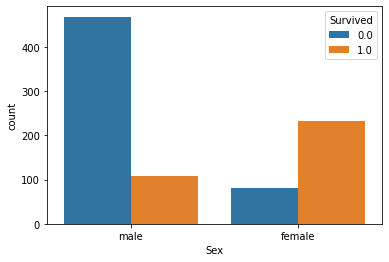

In [4]:
sns.countplot(view_data["Sex"], hue=view_data["Survived"])
display(view_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().round(3))

C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


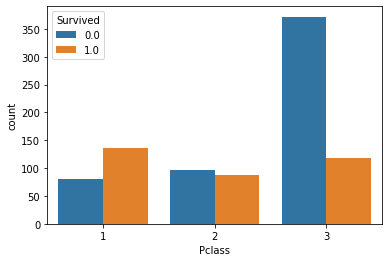

In [5]:
sns.countplot(view_data["Pclass"], hue=view_data["Survived"])
display(view_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().round(3))

C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Embarked,Survived
0,C,0.554
1,Q,0.390
2,S,0.337


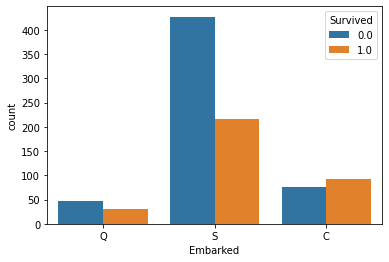

In [6]:
sns.countplot(view_data["Embarked"], hue=view_data["Survived"])
display(view_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().round(3))

C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Cabin,Survived
0,A,0.467
1,B,0.745
2,C,0.593
3,D,0.758
4,E,0.750
5,F,0.615
6,G,0.500
7,NoCabin,0.300
8,T,0.000


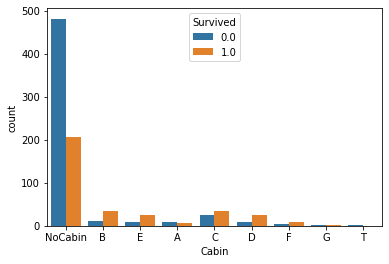

In [7]:
view_data["Cabin"] = view_data["Cabin"].apply(lambda x : str(x)[0] if not pd.isnull(x) else "NoCabin")
sns.countplot(view_data["Cabin"], hue=view_data["Survived"])
display(view_data[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean().round(3))

C:\Users\gordon_zhuang\Anaconda3\envs\forjupyter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'a')

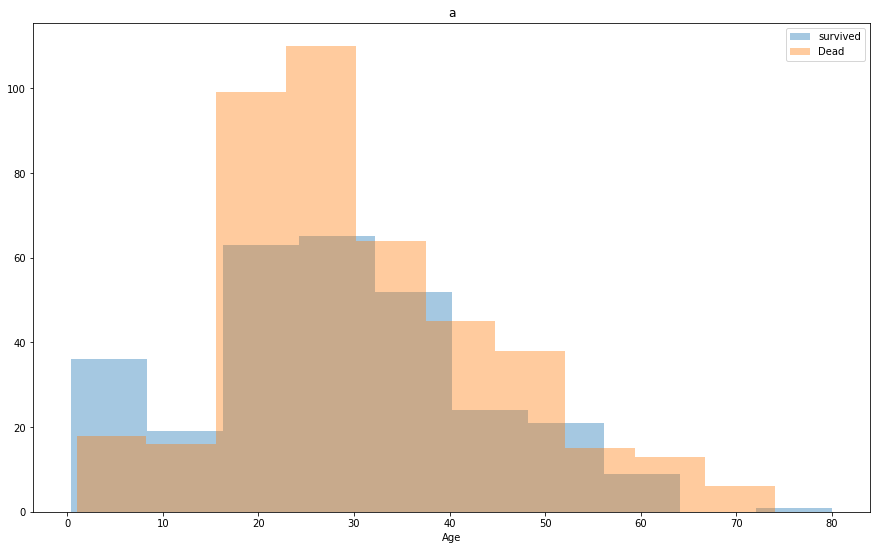

In [8]:
survived = (view_data.Survived == 1)
dead = (view_data.Survived == 0)

fig, ax= plt.subplots(figsize = (15,9))
ax = sns.distplot(view_data.loc[survived,"Age"], kde = False, bins = 10, label = "survived")
ax = sns.distplot(view_data.loc[dead,"Age"], kde = False, bins = 10,  label = "Dead")
ax.legend()
ax.set_title("a")

In [9]:
view_data["Embarked"] = view_data["Embarked"].fillna('S')
view_data["Fare"] = view_data["Fare"].fillna(view_data["Fare"].mean())
view_data["Fare"] = view_data["Fare"].fillna(view_data["Fare"].mean())

In [10]:
view_data["Sex_Code"] = view_data["Sex"].map({"male":1, "female":0}).astype("int")
view_data["Famaily_Size"] = view_data["SibSp"] + view_data['Parch']+1
view_data["Embarked_Code"] = view_data["Embarked"].map({"C":0.554, "Q":0.39, "S":0.337}).astype("float")
view_data["Cabin_Code"] = view_data["Cabin"].map({"A":0.467, "B":0.745, "C":0.593, "D":0.758, "E":0.75, "F":0.615, "G":0.5, "NoCabin":0.3, "T":0}).astype("float")
view_data = view_data.drop("Sex",axis = 1)
view_data = view_data.drop("SibSp",axis = 1)
view_data = view_data.drop("Parch",axis = 1)
view_data = view_data.drop("Embarked",axis = 1)
view_data = view_data.drop("Cabin",axis = 1)
view_data

,Pclass,Name,Age,Ticket,Fare,Survived,Sex_Code,Famaily_Size,Embarked_Code,Cabin_Code
0,3,"Kelly, Mr. James",34.5,330911,7.8292,NaN,1,1,0.390,0.300
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,NaN,0,2,0.337,0.300
2,2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,NaN,1,1,0.390,0.300
3,3,"Wirz, Mr. Albert",27.0,315154,8.6625,NaN,1,1,0.337,0.300
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,NaN,0,3,0.337,0.300
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",27.0,211536,13.0000,0.0,1,1,0.337,0.300
887,1,"Graham, Miss. Margaret Edith",19.0,112053,30.0000,1.0,0,1,0.337,0.745
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,W./C. 6607,23.4500,0.0,0,4,0.337,0.300
889,1,"Behr, Mr. Karl Howell",26.0,111369,30.0000,1.0,1,1,0.554,0.593


In [11]:
train_data = view_data[:len(rawdata1)]
test_data = view_data[len(rawdata1):]
train_data

,Pclass,Name,Age,Ticket,Fare,Survived,Sex_Code,Famaily_Size,Embarked_Code,Cabin_Code
0,3,"Kelly, Mr. James",34.5,330911,7.8292,NaN,1,1,0.390,0.300
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,NaN,0,2,0.337,0.300
2,2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,NaN,1,1,0.390,0.300
3,3,"Wirz, Mr. Albert",27.0,315154,8.6625,NaN,1,1,0.337,0.300
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,NaN,0,3,0.337,0.300
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",NaN,A.5. 3236,8.0500,NaN,1,1,0.337,0.300
414,1,"Oliva y Ocana, Dona. Fermina",39.0,PC 17758,108.9000,NaN,0,1,0.554,0.593
415,3,"Saether, Mr. Simon Sivertsen",38.5,SOTON/O.Q. 3101262,7.2500,NaN,1,1,0.337,0.300
416,3,"Ware, Mr. Frederick",NaN,359309,8.0500,NaN,1,1,0.337,0.300
